# Movie Lens DataSet

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.style.use('seaborn')

Load do database contendo os títulos dos filmes, bem como seus respectivos ID's, ano de lançamento e gêneros.

In [2]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
filmes.shape

(9742, 3)

In [4]:
filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   filmeId  9742 non-null   int64 
 1   titulo   9742 non-null   object
 2   generos  9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


O database de filmes não possi dados faltantes.

Load do database contendo as avaliações de cada filme.

In [5]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
avaliacoes.shape

(100836, 4)

In [7]:
avaliacoes.nunique()

usuarioId      610
filmeId       9724
nota            10
momento      85043
dtype: int64

In [8]:
np.sort(avaliacoes['nota'].unique())

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [9]:
avaliacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   usuarioId  100836 non-null  int64  
 1   filmeId    100836 non-null  int64  
 2   nota       100836 non-null  float64
 3   momento    100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


O database de avaliações também não possui dados faltantes e contém 610 usuários únicos que avaliaram 9724 filmes diferentes. As notas variam de 0,5 a 5. 

## Nota média de cada filme

Criando uma coluna no dataframe "filmes" contendo as notas médias com duas casas decimais para cada filme e renomeando a mesma para "nota_media".

In [10]:
filmes = filmes.join(avaliacoes.groupby(['filmeId'])["nota"].mean().round(2), on='filmeId')
filmes.rename(columns={'nota': 'nota_media'}, inplace = True)
filmes.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07


In [11]:
filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   filmeId     9742 non-null   int64  
 1   titulo      9742 non-null   object 
 2   generos     9742 non-null   object 
 3   nota_media  9724 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 304.6+ KB


In [12]:
filmes.isna().sum()

filmeId        0
titulo         0
generos        0
nota_media    18
dtype: int64

Observa-se que há 18 filmes sem avaliações nesse dataset. 

São eles:



In [13]:
filmes['titulo'][filmes['nota_media'].isna()]

816                            Innocents, The (1961)
2211                                  Niagara (1953)
2499                          For All Mankind (1989)
2587    Color of Paradise, The (Rang-e khoda) (1999)
3118                  I Know Where I'm Going! (1945)
4037                              Chosen, The (1981)
4506     Road Home, The (Wo de fu qin mu qin) (1999)
4598                                  Scrooge (1970)
4704                                    Proof (1991)
5020                       Parallax View, The (1974)
5293                        This Gun for Hire (1942)
5421                    Roaring Twenties, The (1939)
5452                     Mutiny on the Bounty (1962)
5749              In the Realms of the Unreal (2004)
5824                        Twentieth Century (1934)
5837                       Call Northside 777 (1948)
5957                    Browning Version, The (1951)
7565                              Chalet Girl (2011)
Name: titulo, dtype: object

## Total de avaliações por filme

Criando uma coluna no dataframe "filmes" contendo o número de avaliações de cada filme e renomeando a mesma para "n_avaliacoes".

In [14]:
filmes = filmes.join(avaliacoes.groupby(['filmeId'])['nota'].count(), on='filmeId')
filmes.rename(columns={'nota': 'n_avaliacoes'}, inplace = True)
filmes.head()

,filmeId,titulo,generos,nota_media,n_avaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


In [15]:
filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filmeId       9742 non-null   int64  
 1   titulo        9742 non-null   object 
 2   generos       9742 non-null   object 
 3   nota_media    9724 non-null   float64
 4   n_avaliacoes  9724 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 380.7+ KB


## Gêneros únicos

In [16]:
filmes['generos'] = filmes['generos'].str.split(pat='|')
filmes.head()

,filmeId,titulo,generos,nota_media,n_avaliacoes
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",3.92,215.0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",3.43,110.0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",3.26,52.0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",2.36,7.0
4,5,Father of the Bride Part II (1995),[Comedy],3.07,49.0


Gêneros dos filmes e seu respectivo número de aparições:

In [17]:
filmes.explode('generos')['generos'].value_counts()

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: generos, dtype: int64

Plot do resultado anterior:

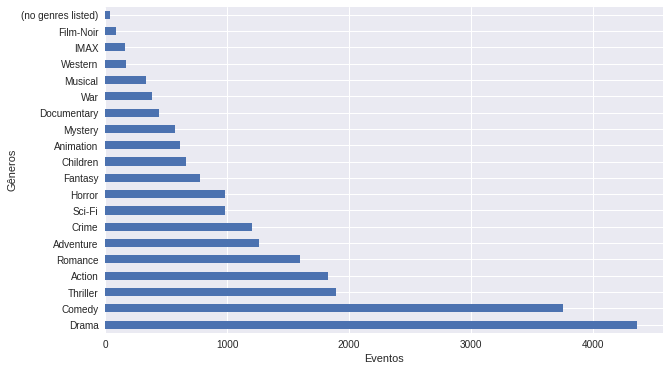

In [18]:
filmes.explode('generos')['generos'].value_counts().plot(kind='barh',figsize=(10,6))
plt.xlabel('Eventos')
plt.ylabel('Gêneros')
plt.show()